In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import datetime
import yfinance as yf
stock = "GOOG"

In [13]:
e=datetime.now()
s=datetime(e.year-25,e.month,e.day)

In [15]:
e

datetime.datetime(2025, 1, 4, 8, 10, 55, 287190)

In [17]:
s

datetime.datetime(2000, 1, 4, 0, 0)

In [19]:
e

datetime.datetime(2025, 1, 4, 8, 10, 55, 287190)

In [21]:
google_data=yf.download(stock,s,e)

[*********************100%***********************]  1 of 1 completed


In [23]:
google_data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.490186,2.582506,2.381485,2.481747,897427216
2004-08-20,2.687981,2.707090,2.494156,2.506813,458857488
2004-08-23,2.715032,2.816287,2.706346,2.748535,366857939
2004-08-24,2.602608,2.769629,2.570345,2.760696,306396159
2004-08-25,2.630652,2.680288,2.578039,2.604842,184645512
...,...,...,...,...,...
2024-12-27,194.039993,196.800003,191.972000,196.470001,14693000
2024-12-30,192.690002,193.779999,190.360001,190.865005,12209500


In [25]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5129.000000,5129.000000,5129.000000,5129.000000,5.129000e+03
mean,47.792026,48.275923,47.293251,47.771162,1.136868e+08
std,46.497987,46.981446,46.009415,46.467637,1.488604e+08
min,2.481995,2.524930,2.381485,2.461645,1.584340e+05
25%,13.075334,13.202646,12.939583,13.085012,2.667000e+07
50%,27.550596,27.719380,27.250003,27.581897,5.258000e+07
75%,62.904976,63.252728,62.095885,62.774444,1.393002e+08
max,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [27]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5129 entries, 2004-08-19 to 2025-01-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5129 non-null   float64
 1   (High, GOOG)    5129 non-null   float64
 2   (Low, GOOG)     5129 non-null   float64
 3   (Open, GOOG)    5129 non-null   float64
 4   (Volume, GOOG)  5129 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 240.4 KB


In [29]:
google_data.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [35]:
google_data['250']=google_data['Close'].rolling(250).mean()

In [39]:
google_data['100']=google_data['Close'].rolling(100).mean()

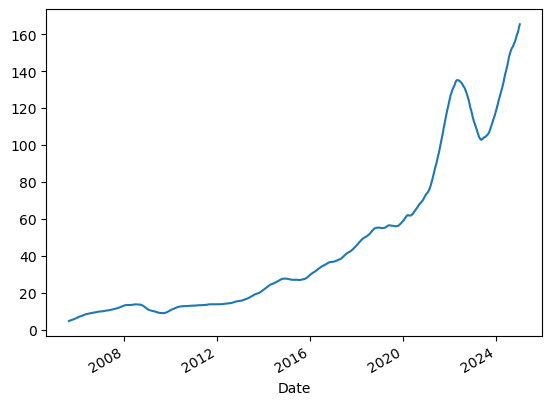

In [41]:
plot_graph(google_data['250'])

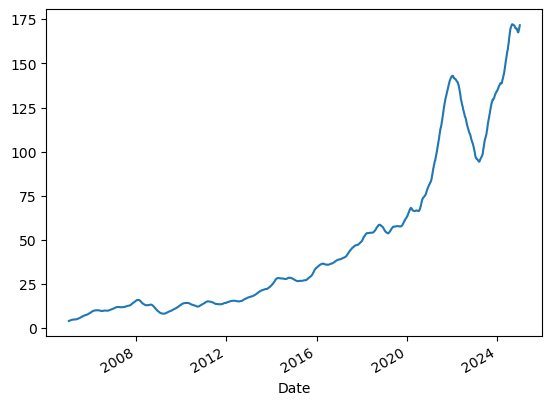

In [45]:
plot_graph(google_data['100'])

In [77]:
plot_graph(google_data[['Close','250']],'250')

TypeError: plot_graph() takes 1 positional argument but 2 were given

In [65]:
print(type(google_data([['100', '250']])))

TypeError: 'DataFrame' object is not callable

In [67]:
data = google_data([['100', '250']])
print(data.head())  # Check if data is a valid DataFrame


TypeError: 'DataFrame' object is not callable

In [69]:
def plot_graph(values):
    values.plot()

In [71]:
for column in google_data.column:
    plot_graph(google_data[column])

AttributeError: 'DataFrame' object has no attribute 'column'

In [114]:
def plot_graph(values):
    for column in google_data.columns: 
        plt.figure()# Use 'columns' instead of 'column'
plot_graph(google_data)  # Pass the correct column name

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [115]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [116]:
<Figure size 640x480 with 0 Axes>

SyntaxError: invalid decimal literal (3069594957.py, line 1)

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

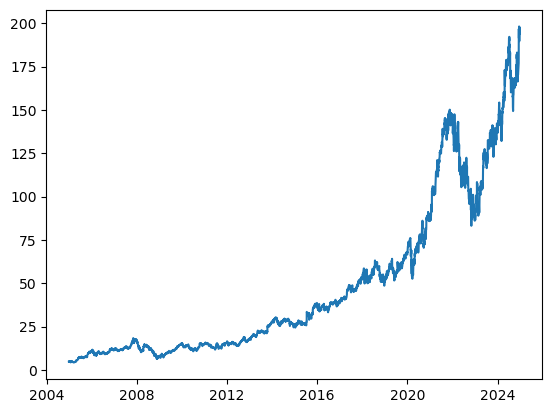

In [117]:
import matplotlib.pyplot as plt

def plot_graph(df):
    for column in df.columns:
        plt.figure()  # Create a new figure for each column
        df[column].plot(title=column)  # Plot the column data and set the title
        plt.xlabel("Index")
        plt.ylabel("Values")
        plt.show()  # Display the plot

# Call the function with your DataFrame
plot_graph(google_data)


In [81]:
import pandas as pd
df=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [83]:
for i in range(2009,2024):
    print(i,list(google_data.index.year).count(i))

2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [85]:
google_data['MA_for_250_days']=google_data['Close'].rolling(250).mean()
google_data['MA_for_100_days']=google_data['Close'].rolling(100).mean()

In [87]:
google_data['MA_for_250_days'][0:255].tail(10)

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.016016
2005-08-16    5.034412
2005-08-17    5.051962
2005-08-18    5.068896
2005-08-19    5.086281
2005-08-22    5.102960
Name: MA_for_250_days, dtype: float64

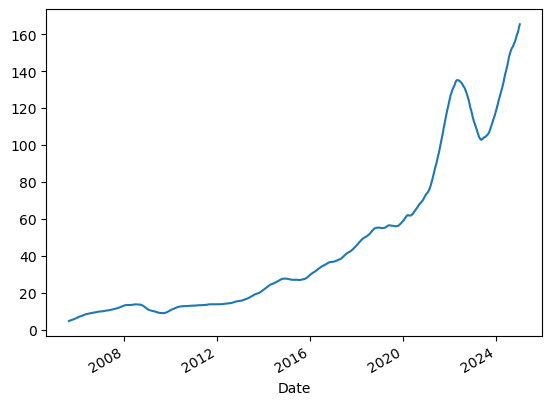

In [89]:
plot_graph(google_data['MA_for_250_days'])

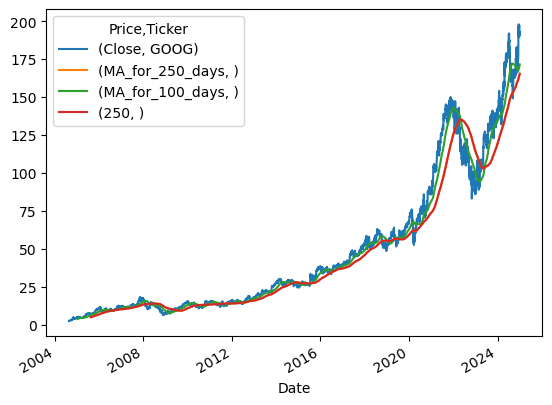

In [91]:
google_data[['Close','MA_for_250_days','MA_for_100_days','250']].plot()
plt.show()

In [94]:
print(google_data[['MA_for_250_days', 'MA_for_100_days']].isna().sum())


Price            Ticker
MA_for_250_days            249
MA_for_100_days             99
dtype: int64


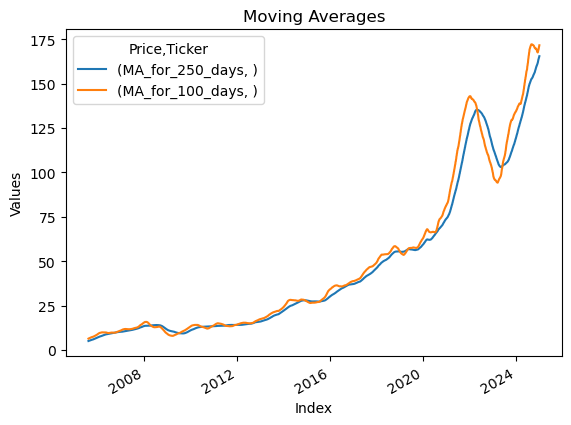

In [96]:
google_data[['MA_for_250_days', 'MA_for_100_days']].dropna().plot(title="Moving Averages")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()


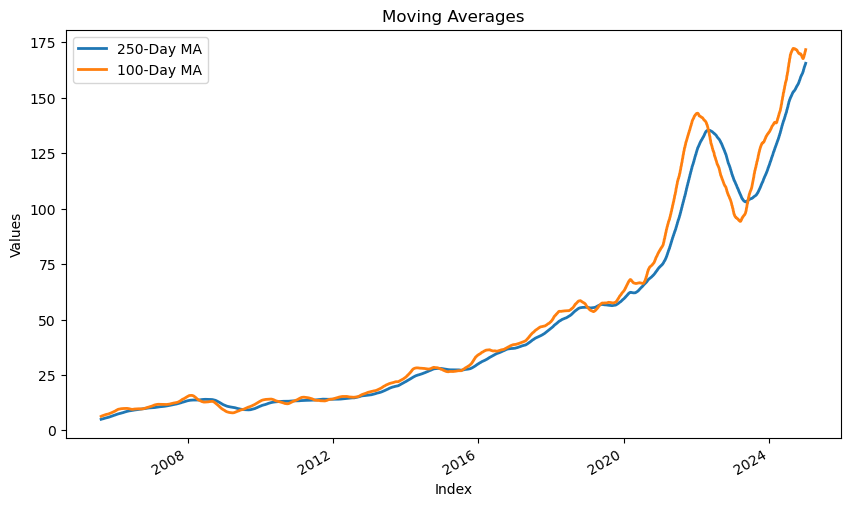

In [98]:
google_data[['MA_for_250_days', 'MA_for_100_days']].dropna().plot(title="Moving Averages", figsize=(10, 6), linewidth=2)
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(["250-Day MA", "100-Day MA"])
plt.show()


In [100]:
google_data[['MA_for_250_days', 'MA_for_100_days']].dropna(how='all')


Price,MA_for_250_days,MA_for_100_days
Ticker,,
Date,,
2005-01-10,NaN,3.831197
2005-01-11,NaN,3.854327
2005-01-12,NaN,3.875936
2005-01-13,NaN,3.897261
2005-01-14,NaN,3.920863
...,...,...
2024-12-27,164.667500,170.537083
2024-12-30,164.882018,170.860415


In [104]:
google_data['Change']=google_data['Close'].pct_change()

In [108]:
google_data['Change']

Date
2004-08-19         NaN
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
                ...   
2024-12-27   -0.015525
2024-12-30   -0.006957
2024-12-31   -0.011677
2025-01-02    0.000998
2025-01-03    0.013114
Name: Change, Length: 5129, dtype: float64

In [110]:
google_data[['Close','Change']]

Price,Close,Change
Ticker,GOOG,
Date,,
2004-08-19,2.490186,NaN
2004-08-20,2.687981,0.079430
2004-08-23,2.715032,0.010064
2004-08-24,2.602608,-0.041408
2004-08-25,2.630652,0.010775
...,...,...
2024-12-27,194.039993,-0.015525
2024-12-30,192.690002,-0.006957


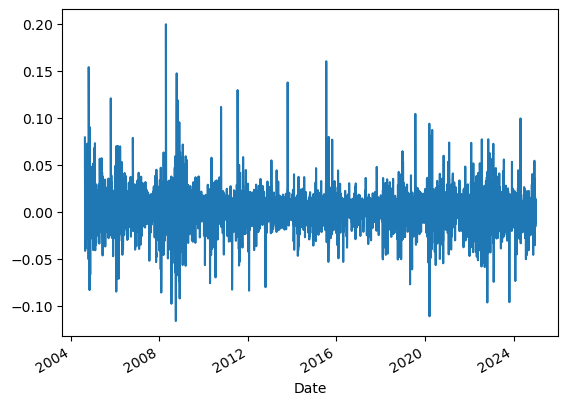

In [114]:
plot_graph(google_data['Change'])

In [116]:
plot_graph(google_data['Change','250'])

KeyError: ('Change', '250')

In [118]:
# Normalization
Close_price=google_data['Close']

In [120]:
Close_price

Ticker,GOOG
Date,
2004-08-19,2.490186
2004-08-20,2.687981
2004-08-23,2.715032
2004-08-24,2.602608
2004-08-25,2.630652
...,...
2024-12-27,194.039993
2024-12-30,192.690002
2024-12-31,190.440002


In [124]:
max(Close_price.values),min(Close_price.values)

(array([198.16000366]), array([2.48199487]))

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Specify a range as a tuple, e.g., (0, 1)
scaler_data=scaler.fit_transform(Close_price)

In [134]:
scaler_data

array([[4.18589209e-05],
       [1.05267845e-03],
       [1.19091950e-03],
       ...,
       [9.60547425e-01],
       [9.61518421e-01],
       [9.74294512e-01]])